# Environment Preparation
Activate Pipenv
```bash
pipenv shell
```

# Q1. Prepare the dataset

## Baseline Models
Baseline models created using `baseline_model_nyc_taxi_data.ipynb` notebook. Model saved in `models/lin_reg.bin` and reference file saved in `data/reference.parquet`

In [5]:
import pandas as pd
df=pd.read_parquet('data/green_tripdata_2024-03.parquet')
print(f'The number of rows March 2024 Green Taxi data is {df.shape[0]}')

The number of rows March 2024 Green Taxi data is 57457


# Q2. Metric

Build docker container
```bash
docker compose up -d --build
```

In [8]:
! docker compose up -d --build

WARN[0000] /workspaces/mlops-zoomcamp/05-monitoring/homework/docker-compose.yml: `version` is obsolete 
[+] Running 1/0
 ✔ Network homework_front-tier  Created                                    0.1s 
 ⠋ Network homework_back-tier   Creating                                   0.0s 
[+] Running 2/2
 ✔ Network homework_front-tier   Created                                   0.1s 
 ✔ Network homework_back-tier    Created                                   0.1s 
 ⠋ Container homework-grafana-1  Creatin...                                0.0s 
 ⠋ Container homework-adminer-1  Creatin...                                0.0s 
 ⠋ Container homework-db-1       Creating                                  0.0s 
[+] Running 2/5
 ✔ Network homework_front-tier   Created                                   0.1s 
 ✔ Network homework_back-tier    Created                                   0.1s 
 ⠙ Container homework-grafana-1  Creatin...                                0.1s 
 ⠙ Container homework-adminer-1  Creat

Grafana login -> http://127.0.0.1:3000/ `admin`:`admin`

PostgreSQL login -> http://127.0.0.1:8080/index.php `postgres`:`postgres`

DB name: `test`

Metric that I choose is `ColumnSummaryMetric` for the prediction as our extra metric.

# Q3. Monitoring
Run `monitoring_data.py` file with this parameters:
```bash
python monitoring_data.py --data-file ./data/green_tripdata_2024-03.parquet --ref-data-file ./data/reference.parquet
```

In [9]:
! python monitoring_data.py --data-file ./data/green_tripdata_2024-03.parquet --ref-data-file ./data/reference.parquet

[06/23/24 16:17:31] INFO     Loading data                 ]8;id=666135;file:///workspaces/mlops-zoomcamp/05-monitoring/homework/monitoring_data.py\monitoring_data.py]8;;\:]8;id=411401;file:///workspaces/mlops-zoomcamp/05-monitoring/homework/monitoring_data.py#192\192]8;;\
[06/23/24 16:17:32] INFO     Loading model                ]8;id=988588;file:///workspaces/mlops-zoomcamp/05-monitoring/homework/monitoring_data.py\monitoring_data.py]8;;\:]8;id=796973;file:///workspaces/mlops-zoomcamp/05-monitoring/homework/monitoring_data.py#197\197]8;;\
                    INFO     Starting analysis            ]8;id=114232;file:///workspaces/mlops-zoomcamp/05-monitoring/homework/monitoring_data.py\monitoring_data.py]8;;\:]8;id=150203;file:///workspaces/mlops-zoomcamp/05-monitoring/homework/monitoring_data.py#205\205]8;;\
current float64. Returning type from reference
current float64. Returning type from reference
current float64. Returning type from reference
current float64.

Maximum fare amount of March 2024 daily is `14.2`

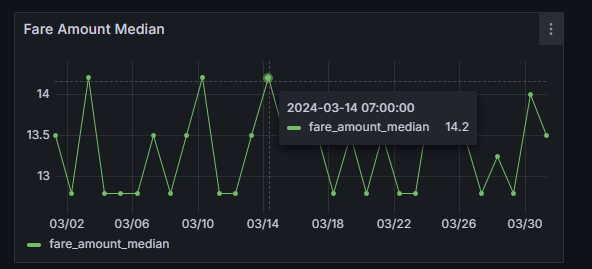

# Q4. Dashboard
Grafana dashboard config file saved in `project_folder/dashboards`